<a href="https://colab.research.google.com/github/BikramKC7/Fusemachines_Assignment_1/blob/main/BikramKC_DataVisualization_Fusemachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Used Datset**

- Seaborn’s Car Crashes Dataset

1. Total: Total number of crashes.
2. Speeding: Crashes involving speeding.
3. Alcohol: Crashes involving alcohol.
4. Not Distracted: Percentage of drivers not distracted.
5. No Previous: Percentage of drivers with no previous crashes.
6. Ins_premium: Average insurance premium in the state.
It reflects how much people typically pay per year for car insurance in that state
7. Ins_losses: Total insurance losses in the state.
It reflects how much money insurance companies lose (i.e., pay out) per insured driver in claims.
8. abbrev: Two-letter abbreviation of the U.S. state

In [3]:
# Load the 'car_crashes' dataset
car_crashes = sns.load_dataset("car_crashes")

In [4]:
df = car_crashes.copy()

In [5]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


What each row define in the datasets
In the state of Alabama (AL):

- There were 18.8 deaths due to car crashes for every 1 billion miles driven.

- Out of those, 7.332 deaths were linked to speeding.

- 5.640 deaths were related to alcohol consumption while driving.

- 18.048% of drivers involved in crashes were not distracted at the time.

- 15.040% of drivers involved had no previous crashes on record.

- The average annual car insurance premium was $784.55.

- The average insurance losses per driver were $145.08.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [7]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [8]:
df.isnull().sum()

,0
total,0
speeding,0
alcohol,0
not_distracted,0
no_previous,0
ins_premium,0
ins_losses,0
abbrev,0


**Univariate Analysis (One variable at a time)**

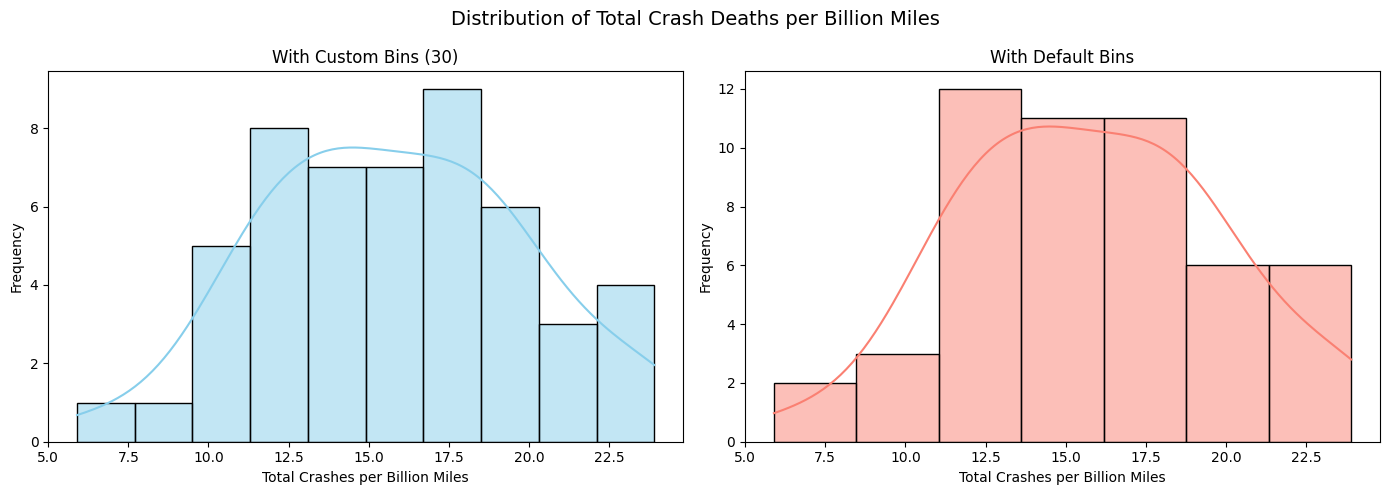

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Custom bins (20)
sns.histplot(df['total'], kde=True, bins=10, ax=ax1, color='skyblue')
ax1.set_title('With Custom Bins (30)')
ax1.set_xlabel('Total Crashes per Billion Miles')
ax1.set_ylabel('Frequency')

# Plot 2: Default bins (auto-selected by Seaborn)
sns.histplot(df['total'], kde=True, ax=ax2, color='salmon')
ax2.set_title('With Default Bins')
ax2.set_xlabel('Total Crashes per Billion Miles')
ax2.set_ylabel('Frequency')

# Main title for the entire figure
plt.suptitle('Distribution of Total Crash Deaths per Billion Miles', fontsize=14)
plt.tight_layout()  # Prevent overlapping
plt.show()

In [25]:
# Define bins and labels
bins = [0,10, 15, 20, 25]
labels = ['0-10','10–15', '15–20', '20–25']

# Create a new column with bin labels
df['total_range'] = pd.cut(df['total'], bins=bins, labels=labels, include_lowest=True)

# Count frequency in each range
range_counts = df['total_range'].value_counts().sort_index()

# Display the result
print(range_counts)
# Filter and list states in the 10–15 range
states_10_15 = df[df['total_range'] == '10–15']['abbrev'].tolist()

# Filter and list states in the 15–20 range
states_15_20 = df[df['total_range'] == '15–20']['abbrev'].tolist()

# Display results
print("States with total crash rate in 10–15 range:", states_10_15)
print("States with total crash rate in 15–20 range:", states_15_20)

total_range
0-10      3
10–15    20
15–20    21
20–25     7
Name: count, dtype: int64
States with total crash rate in 10–15 range: ['CA', 'CO', 'CT', 'IL', 'IN', 'MD', 'MI', 'NE', 'NV', 'NH', 'NJ', 'NY', 'OH', 'OR', 'RI', 'UT', 'VT', 'VA', 'WA', 'WI']
States with total crash rate in 15–20 range: ['AL', 'AK', 'AZ', 'DE', 'FL', 'GA', 'HI', 'ID', 'IA', 'KS', 'ME', 'MS', 'MO', 'NM', 'NC', 'OK', 'PA', 'SD', 'TN', 'TX', 'WY']


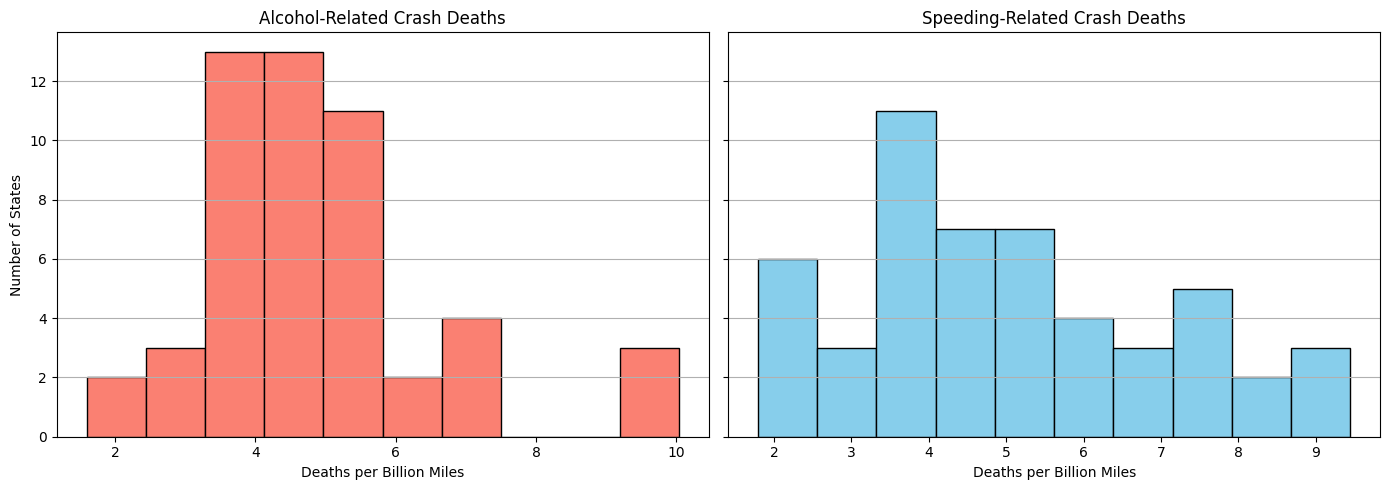

In [31]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Histogram for alcohol-related crashes
axes[0].hist(df['alcohol'], bins=10, color='salmon', edgecolor='black')
axes[0].set_title('Alcohol-Related Crash Deaths')
axes[0].set_xlabel('Deaths per Billion Miles')
axes[0].set_ylabel('Number of States')
axes[0].grid(axis='y')

# Histogram for speeding-related crashes
axes[1].hist(df['speeding'], bins=10, color='skyblue', edgecolor='black')
axes[1].set_title('Speeding-Related Crash Deaths')
axes[1].set_xlabel('Deaths per Billion Miles')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

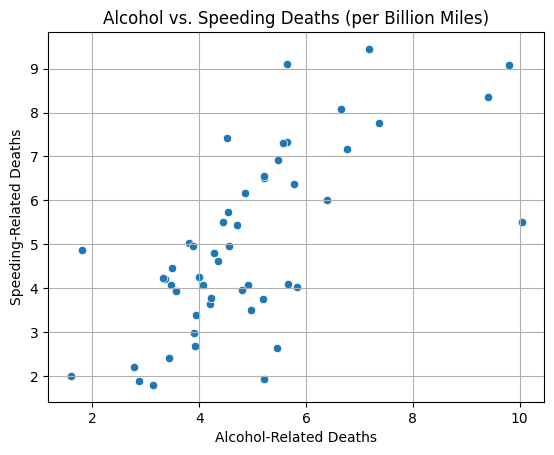

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(data=df, x='alcohol', y='speeding')
plt.title('Alcohol vs. Speeding Deaths (per Billion Miles)')
plt.xlabel('Alcohol-Related Deaths')
plt.ylabel('Speeding-Related Deaths')
plt.grid(True)
plt.show()


In [33]:
correlation = df['alcohol'].corr(df['speeding'])
print("Correlation between alcohol and speeding:", correlation)

Correlation between alcohol and speeding: 0.6697185644227318


**insights derived from your analysis**

States with higher alcohol-involved crash rates also tend to have higher speeding-related crash rates.

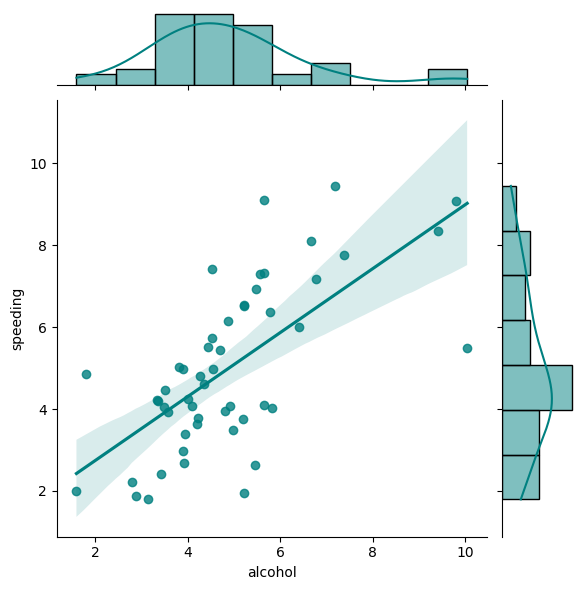

In [34]:
sns.jointplot(data=df, x='alcohol', y='speeding', kind='reg', color='teal')


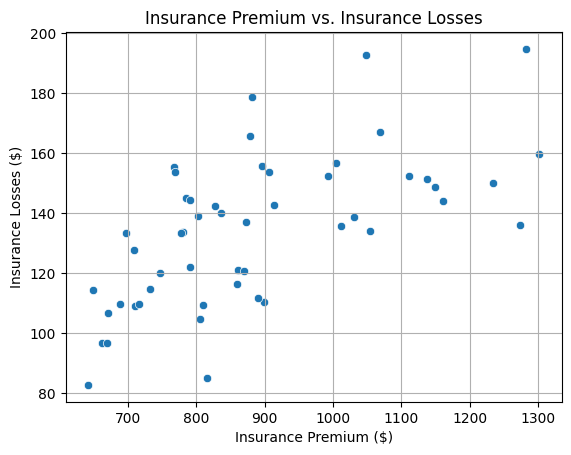

Correlation between insurance premium and losses: 0.6231164385197064


In [37]:
sns.scatterplot(data=df, x='ins_premium', y='ins_losses')
plt.title('Insurance Premium vs. Insurance Losses')
plt.xlabel('Insurance Premium ($)')
plt.ylabel('Insurance Losses ($)')
plt.grid(True)
plt.show()


correlation = df['ins_premium'].corr(df['ins_losses'])
print("Correlation between insurance premium and losses:", correlation)

**insights derived from your analysis**

As insurance losses (claims paid out) increase, insurance premiums (what people pay) also tend to increase.

This suggests that insurance companies likely adjust premiums based on the expected losses in each state.

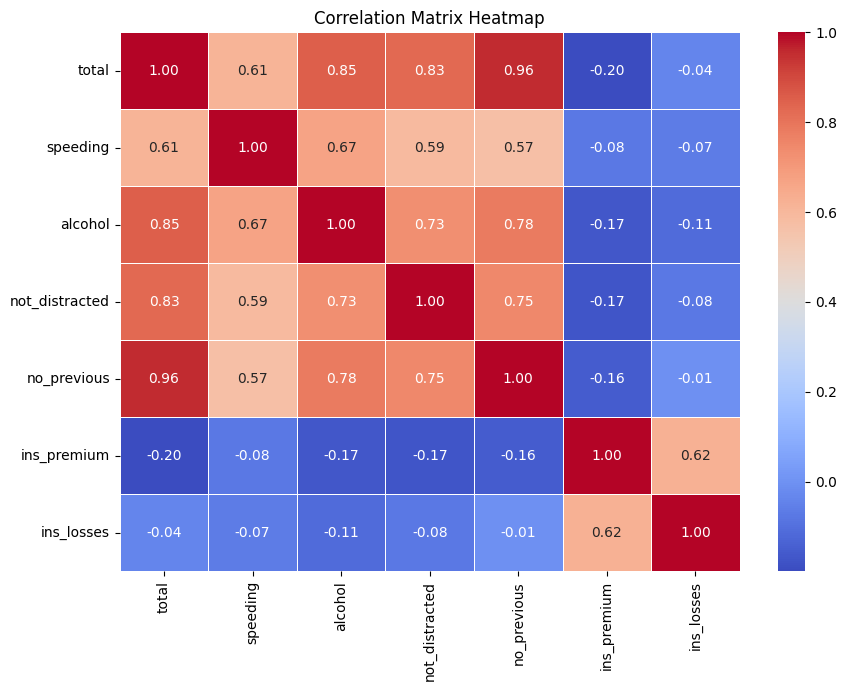

In [39]:
# Assuming df has a column 'abbrev' which is non-numeric
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # keep only numeric columns

# Calculate correlation matrix on numeric columns only
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**insights derived from your analysis**

**not_distracted (0.83): Surprisingly, "not distracted" crashes correlate highly.**

Interpretation: May reflect systemic issues (e.g., poor road design) where distraction isn’t the primary cause.

**no_previous (0.96): **
Drivers with no prior accidents are highly associated with total crashes.

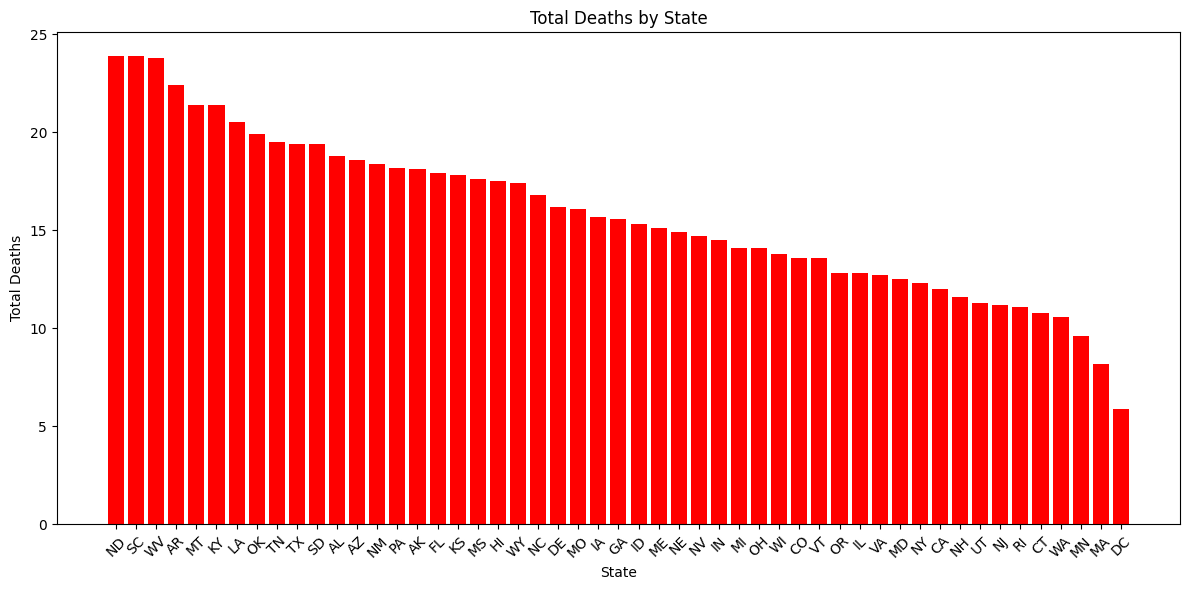

In [41]:
# Sort data by total deaths for better visualization (optional)
df_sorted = df.sort_values(by='total', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_sorted['abbrev'], df_sorted['total'], color='red')

plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by State')
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.tight_layout()
plt.show()

In [42]:
top_states = df.sort_values(by='total', ascending=False).head(3)
print(top_states[['abbrev', 'total']])

   abbrev  total
34     ND   23.9
40     SC   23.9
48     WV   23.8


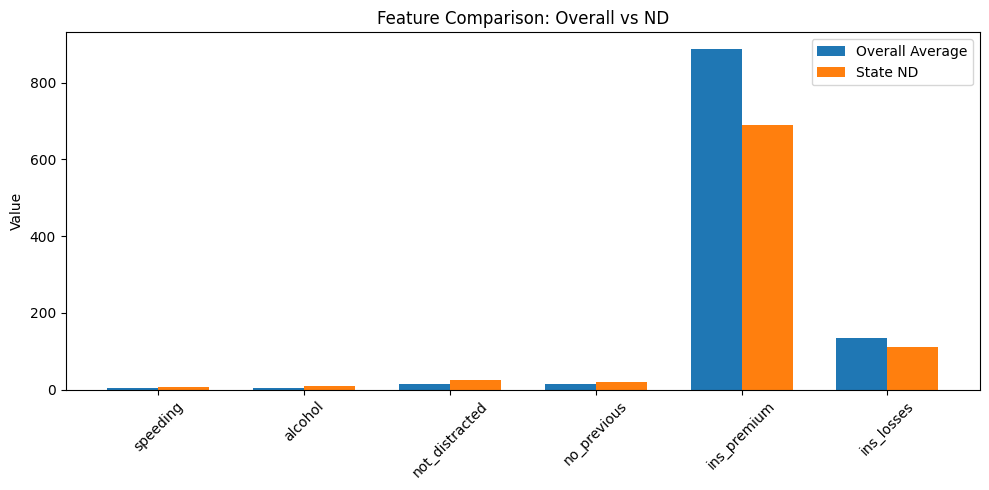

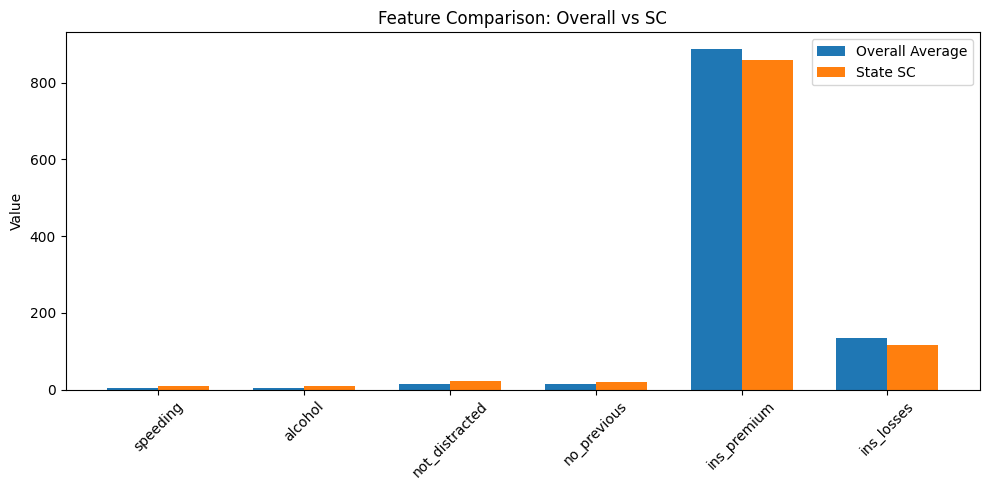

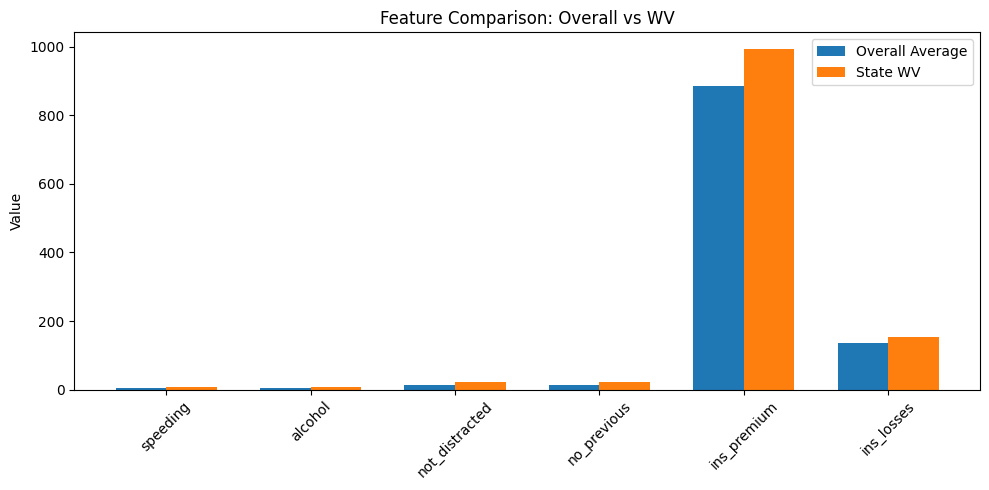

In [43]:
features = ['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']

# Mean values for the whole dataset
overall_means = df[features].mean()

# Mean values for top states
top_means = top_states[features]

# Plot comparison for each top state
for i, (index, row) in enumerate(top_means.iterrows()):
    plt.figure(figsize=(10,5))
    x = np.arange(len(features))
    width = 0.35

    plt.bar(x - width/2, overall_means, width, label='Overall Average')
    plt.bar(x + width/2, row.values, width, label=f'State {top_states.loc[index, "abbrev"]}')

    plt.xticks(x, features, rotation=45)
    plt.ylabel('Value')
    plt.title(f'Feature Comparison: Overall vs {top_states.loc[index, "abbrev"]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Most Likely Causes of Death in ND**
1. Alcohol-Related Crashes (Highest Deviation)

  - Why? Rural areas often have fewer ride options, leading to more drunk driving.

2. Non-Distracted Crashes (Unexpectedly High)

 - Possible Causes: sudden unexpected possible reasons.
